# OpenCV library and Python

## What is OpenCV? /  OpenCVとは?

[OpenCV](https://opencv.org/), short for Open Source Computer Vision Library, is an open-source computer vision and machine learning software library. Originally developed by Intel, it is now maintained by a community of developers under the OpenCV Foundation. / [OpenCV](https://opencv.org/)はOpen Source Computer Vision Libraryの略で、オープンソースのコンピュータビジョンおよび機械学習ソフトウェアライブラリである。元々はインテルによって開発されたが、現在はOpenCV Foundationの下で開発者のコミュニティによってメンテナンスされている。




### OpenCV Functionality / OpenCVの機能 

* Image/video I/O, processing, display (core, imgproc, highgui)
* Object/feature detection (objdetect, features2d, nonfree)
* Geometry-based monocular or stereo computer vision (calib3d, stitching, videostab)
* Computational photography (photo, video, superres)
* Machine learning & clustering (ml, flann)
* CUDA acceleration (gpu)

### What can OpenCV do with images? / OpenCVは画像で何ができるのか？

* Read the Image : OpenCV helps you to read the image fro file or directly from camera to make it accessible for further processing. / 画像の読み込み：OpenCVは、ファイルから、またはカメラから直接画像を読み込み、さらなる処理のためにアクセスできるようにします。
* Image Enhacncement : You will be able to enhance image by adjusting the brightness , sharpness or contract of the image. This is helpful to visualize quality of the image. / Image Enhacncement : 画像の明るさ、シャープネス、収縮を調整することで、画像を向上させることができます。これは、画像の品質を視覚化するのに役立ちます。
* Object detection: As you can see in the below image object can also be detected by using OpenCV , Bracelet , watch , patterns, faces can be detected. This can also include to recognize faces , shapes or even objects . / 物体検出： OpenCVは、ブレスレット、時計、パターン、顔を検出することができます。これはまた、顔、形状、あるいはオブジェクトを認識するために含めることができます。
* Image Filtering: You can change image by applying various filters such as blurring or Sharpening. / 画像フィルター： ぼかしやシャープなど、様々なフィルタを適用して画像を変更することができます。
* Draw the Image: OpenCV allows to draw text, lines and any shapes in the images. / 画像の描画 OpenCVでは、画像にテキストや線、任意の図形を描画することができます。
* Saving the Changed Images: After processing , You can save images that are being modified for future analysis. / 変更した画像の保存 処理後、将来の分析のために変更された画像を保存することができます。

## Part 1. Simple image operations / パート1. 簡単な画像操作

### 1.1 Taking a picture / 写真を撮る

In [ ]:
import cv2
from picamera2 import Picamera2
import numpy as np
import matplotlib.pyplot as plt

def take_a_picture():
    # Initialize PiCamera2
    picam2 = Picamera2()
    # Configure the camera (example configuration)
    picam2.preview_configuration.main.size = (640, 480)
    picam2.preview_configuration.main.format = "RGB888"
    picam2.configure("preview")
    picam2.start()
    # Capture an image
    image = picam2.capture_array()
    # Convert from RGB to BGR for OpenCV (if necessary)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    # Stop the camera when done
    picam2.stop()
    # Display the image using Matplotlib since cv2.imshow doesn't work in Jupyter
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert back to RGB for display
    plt.axis('off')  # Turn off axis
    plt.show()
    

### 1.2 Opening an image / 画像を開く

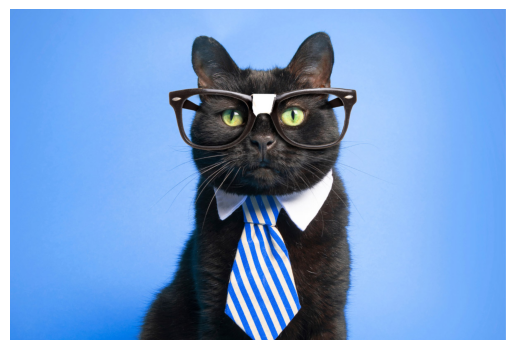

In [6]:
def open_image(image_path):
    # To read image from disk, we use
    # cv2.imread function, in below method,
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    # Since cv2 uses BGR color space, convert it to RGB for correct color display in matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Display the image using matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
    # Return an image, so we can use it later
    return img

image = open_image("pictures/a_cat.jpg")

### 1.2 Saving an image / 画像の保存

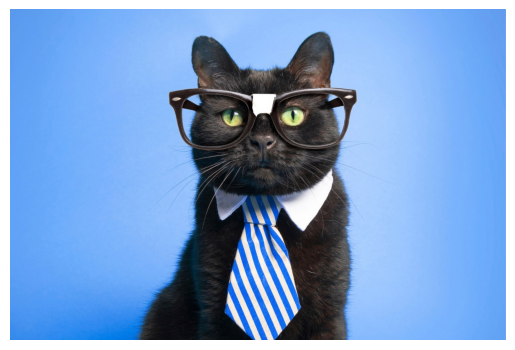

array([[[238, 154,  89],
        [238, 154,  89],
        [238, 154,  89],
        ...,
        [241, 154,  98],
        [230, 153,  97],
        [250, 176, 120]],

       [[238, 154,  89],
        [238, 154,  89],
        [238, 154,  89],
        ...,
        [241, 154,  98],
        [230, 153,  97],
        [250, 176, 120]],

       [[238, 154,  89],
        [238, 154,  89],
        [236, 154,  89],
        ...,
        [239, 154,  98],
        [230, 153,  97],
        [250, 176, 120]],

       ...,

       [[237, 138,  52],
        [236, 137,  51],
        [235, 136,  50],
        ...,
        [243, 162,  95],
        [234, 156,  97],
        [254, 179, 123]],

       [[236, 138,  50],
        [235, 137,  49],
        [234, 136,  48],
        ...,
        [243, 162,  95],
        [234, 156,  97],
        [254, 179, 123]],

       [[236, 138,  50],
        [235, 137,  49],
        [234, 136,  48],
        ...,
        [243, 162,  95],
        [234, 156,  97],
        [254, 179, 123]]

In [9]:
def save_image(image, output_file_path):
    cv2.imwrite(output_file_path, image)

output_file_path = "output/saved_image.jpg"
save_image(image, output_file_path)
open_image(output_file_path)

### 1.3 Splitting colors on image / 画像上の色の分割

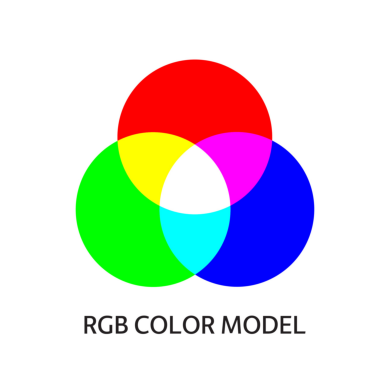

In [18]:
rgb_image = open_image("pictures/rgb.jpg")

In [19]:
def display_color(image, color):
    B, G, R = cv2.split(image)
    if color == "blue":
        output_image = B
    elif color == "red":
        output_image = R
    elif color == "green":
        output_image = G
    else:
        raise ValueError("ERROR: Incorrect color input")
    plt.imshow(output_image)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
    # Return an image, so we can use it later
    return output_image

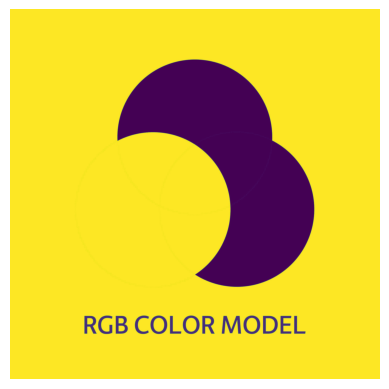

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]],
      shape=(1920, 1920), dtype=uint8)

In [20]:
display_color(rgb_image, "green")

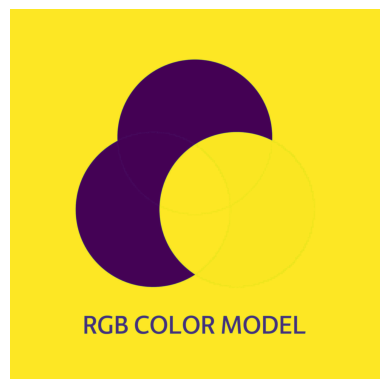

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]],
      shape=(1920, 1920), dtype=uint8)

In [21]:
display_color(rgb_image, "blue")

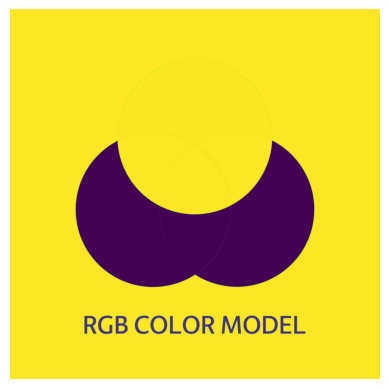

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]],
      shape=(1920, 1920), dtype=uint8)

In [22]:
display_color(rgb_image, "red")

### 1.4 Arithmetic operations with images / 画像を使った算術演算

#### Addition

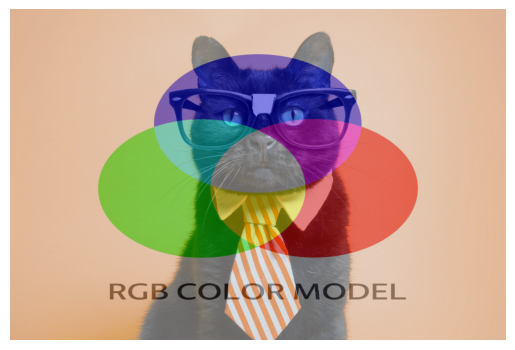

array([[[220, 179, 146],
        [220, 179, 146],
        [220, 179, 146],
        ...,
        [224, 180, 151],
        [218, 178, 150],
        [222, 190, 163]],

       [[220, 179, 146],
        [220, 179, 146],
        [220, 179, 146],
        ...,
        [224, 180, 151],
        [218, 178, 150],
        [222, 190, 163]],

       [[220, 179, 146],
        [220, 179, 146],
        [220, 179, 146],
        ...,
        [224, 180, 151],
        [218, 178, 150],
        [222, 190, 163]],

       ...,

       [[220, 171, 128],
        [220, 170, 128],
        [220, 170, 127],
        ...,
        [227, 182, 149],
        [222, 180, 150],
        [226, 192, 164]],

       [[220, 170, 128],
        [220, 170, 127],
        [219, 170, 126],
        ...,
        [227, 182, 149],
        [222, 180, 150],
        [226, 192, 164]],

       [[220, 170, 128],
        [220, 170, 127],
        [219, 170, 126],
        ...,
        [227, 182, 149],
        [222, 180, 150],
        [226, 192, 164]]

In [24]:

def add_images(image1, image2):
    # Check if images have the same shape
    if image1.shape != image2.shape:
        # If shapes differ, resize one to match the other
        if len(image1.shape) == 2 or image1.shape[2] == 1:  # If image1 is grayscale
            image1 = cv2.cvtColor(image1, cv2.COLOR_GRAY2RGB)
        if len(image2.shape) == 2 or image2.shape[2] == 1:  # If image2 is grayscale
            image2 = cv2.cvtColor(image2, cv2.COLOR_GRAY2RGB)
        
        # Resize image2 to match image1
        image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))
    
    # Now use cv2.addWeighted
    weightedSum = cv2.addWeighted(image1, 0.5, image2, 0.4, 0)
    
    # Display the image (output_image was not defined in your code, so I'll use weightedSum)
    plt.imshow(weightedSum)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
    
    return weightedSum

# Assuming 'image' and 'rgb_image' are your inputs
add_images(image, rgb_image)

#### Substraction

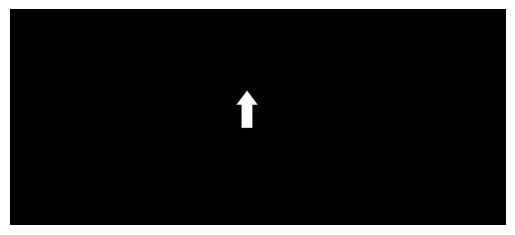

In [25]:
arrow_image = open_image("pictures/hexagon.jpg")

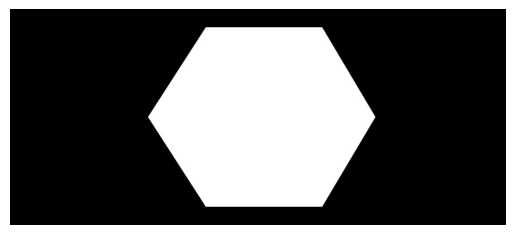

In [26]:
hexagon_image = open_image("pictures/arrow.jpg")

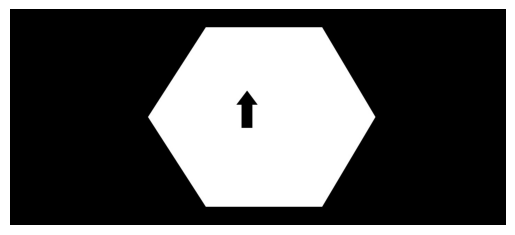

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], shape=(616, 1416, 3), dtype=uint8)

In [27]:
def substract_images(image1, image2):
    sub = cv2.subtract(image1, image2)
    # Display the image (output_image was not defined in your code, so I'll use weightedSum)
    plt.imshow(sub)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
    return sub

substract_images(hexagon_image, arrow_image)

#### Bitwise operations

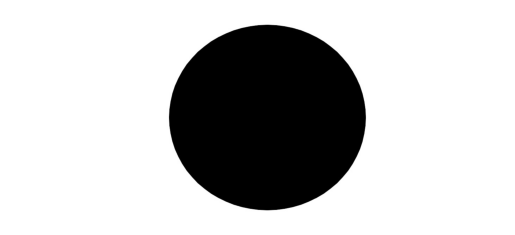

In [28]:
circle_image = open_image("pictures/circle.jpg")

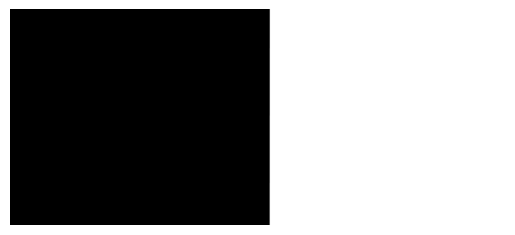

In [29]:
split_image = open_image("pictures/split.jpg")

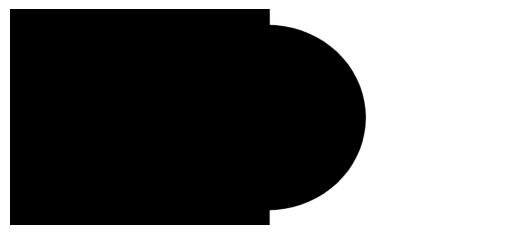

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [30]:
def bitwise_and_operation(image1, image2):
    bit_and = cv2.bitwise_and(image1, image2, mask = None) 
    # Display the image (output_image was not defined in your code, so I'll use weightedSum)
    plt.imshow(bit_and)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
    return bit_and

bitwise_and_operation(circle_image, split_image) 

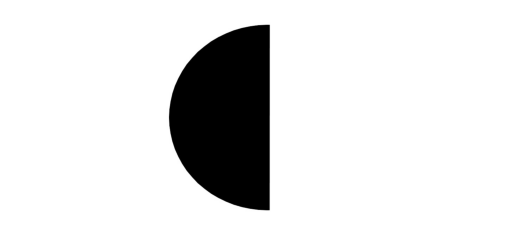

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [32]:
def bitwise_or_operation(image1, image2):
    bit_or = cv2.bitwise_or(image1, image2, mask = None) 
    # Display the image (output_image was not defined in your code, so I'll use weightedSum)
    plt.imshow(bit_or)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
    return bit_or

bitwise_or_operation(circle_image, split_image) 

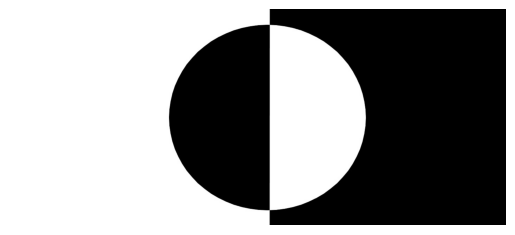

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [33]:
def bitwise_xor_operation(image1, image2):
    bit_xor = cv2.bitwise_xor(image1, image2, mask = None) 
    # Display the image (output_image was not defined in your code, so I'll use weightedSum)
    plt.imshow(bit_xor)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
    return bit_xor

bitwise_xor_operation(circle_image, split_image) 

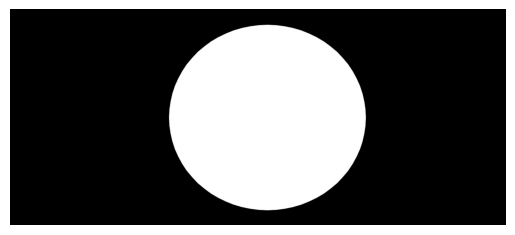

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], shape=(616, 1416, 3), dtype=uint8)

In [35]:
def bitwise_not_operation(image1, image2):
    bit_not = cv2.bitwise_not(image1, image2, mask = None) 
    # Display the image (output_image was not defined in your code, so I'll use weightedSum)
    plt.imshow(bit_not)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
    return bit_not

bitwise_not_operation(circle_image, split_image) 

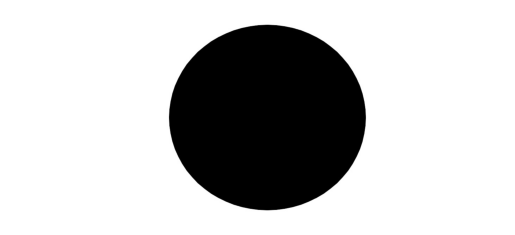

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [36]:
bitwise_not_operation(split_image, circle_image) 